In [2]:
import gdsfactory as gf

2025-05-20 09:53:30.026 | WARNING  | kfactory.kcell:show:3520 - Could not connect to klive server


In [3]:
# length refers to distance along the x axis (horizontal)
# width refers to distance along the y axis (vertical)
# All distances in um

Nb_sti_length = 4.5e3
NbSi_twiddle_middle_gap_length = 2e3
Nb_stm_length = 1.5e3
NbSi_middle_sense_gap_length = 2e3
Nb_sto_length = 1.5e3

NbSi_overhang_length = 5e2

Nb_width = 8e3
NbSi_width = 7e3

total_NbSi_length = 2 * NbSi_overhang_length + NbSi_twiddle_middle_gap_length + NbSi_middle_sense_gap_length + Nb_sti_length + Nb_stm_length + Nb_sto_length

#guard_width = 20
guard_separation = 10

chip_length = 15e3
chip_width = 10e3


In [4]:
print(total_NbSi_length)

12500.0


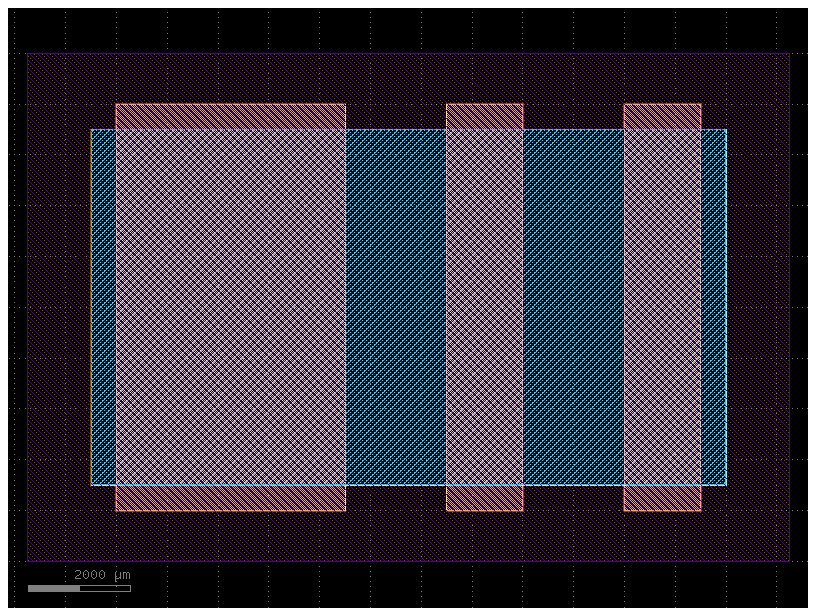

In [5]:
nst = gf.Component()

#-----Define shape of NbSi strip
NbSi_strip = gf.components.rectangle(size=(total_NbSi_length, NbSi_width), layer=(2, 0)) # On layer 2

#-----Make instances of Nb gates
Nb_gate_sti = nst << gf.components.rectangle(size=(Nb_sti_length, Nb_width), layer=(1, 0)) # On layer 1
Nb_gate_stm = nst << gf.components.rectangle(size=(Nb_stm_length, Nb_width), layer=(1, 0)) # On layer 1
Nb_gate_sto = nst << gf.components.rectangle(size=(Nb_sto_length, Nb_width), layer=(1, 0)) # On layer 1

#-----Move Nb gates into position
Nb_gate_stm.movex(Nb_sti_length + NbSi_twiddle_middle_gap_length)
Nb_gate_sto.movex(Nb_sti_length + NbSi_twiddle_middle_gap_length + Nb_stm_length + NbSi_middle_sense_gap_length)

#-----Make instace of NbSi strip
NbSi_strip_1 = nst << NbSi_strip
NbSi_strip_1.movex(-1 * NbSi_overhang_length)
NbSi_strip_1.movey((Nb_width - NbSi_width) / 2)

#-----Make frame for device
frame = nst << gf.components.rectangle(size=(chip_length, chip_width), layer=(15, 0))
frame.movex(- NbSi_overhang_length + (total_NbSi_length - chip_length) / 2)
frame.movey((Nb_width - chip_width) / 2)

gates = nst.get_region(layer=(1, 0))  # Get the region of the polygon
strip = nst.get_region(layer=(2, 0))  # Get the region of the polygon

frame_framed =  nst.get_region(layer=(15, 0)) - gates.sized(guard_separation * 1e3) - strip.sized(guard_separation * 1e3)
nst.add_polygon(frame_framed, layer=(3, 0))  # Add the region to the component

#old frame code
#->
#gates_framed = gates.sized((guard_width + guard_separation) * 1e3) - gates.sized(guard_separation * 1e3) - strip.sized(guard_separation * 1e3)
#nst.add_polygon(gates_framed, layer=(3, 0))  # Add the region to the component
#strip_framed = gates_framed = strip.sized((guard_width + guard_separation) * 1e3) - gates.sized(guard_separation * 1e3) - strip.sized(guard_separation * 1e3)
#nst.add_polygon(strip_framed, layer=(3, 0))  # Add the region to the component
#nst.over_under(layer=(3, 0), distance=0.2)
#<-

#-----Make ALD window
aldWindow =  strip.sized(-5e3)
nst.add_polygon(aldWindow, layer=(4, 0))  # Add the region to the component

#-----Generate gds file for nst device

nst.write_gds("nst_guard.gds")  # write it to a GDS file. You can open it in klayout.
nst.show()  # show it in klayout
nst.plot()  # show it in jupyter notebook